In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import geopandas as gpd
import mapclassify

In [61]:
data = pd.read_csv('prices_provinces.csv',  sep=';')

In [62]:
data

,Regions,euro
0,Groningen (PV),313679
1,Fryslân (PV),323765
2,Drenthe (PV),349757
3,Overijssel (PV),365733
4,Flevoland (PV),394736
5,Gelderland (PV),413316
6,Utrecht (PV),476555
7,Noord-Holland (PV),507271
8,Zuid-Holland (PV),410408
9,Zeeland (PV),328452


In [63]:
data.dtypes

Regions    object
euro        int64
dtype: object

In [64]:
data.isnull().sum()

Regions    0
euro       0
dtype: int64

In [65]:
data['euro'] = data['euro'].astype(float)
data['Regions'] = data['Regions'].str.split().str[0]

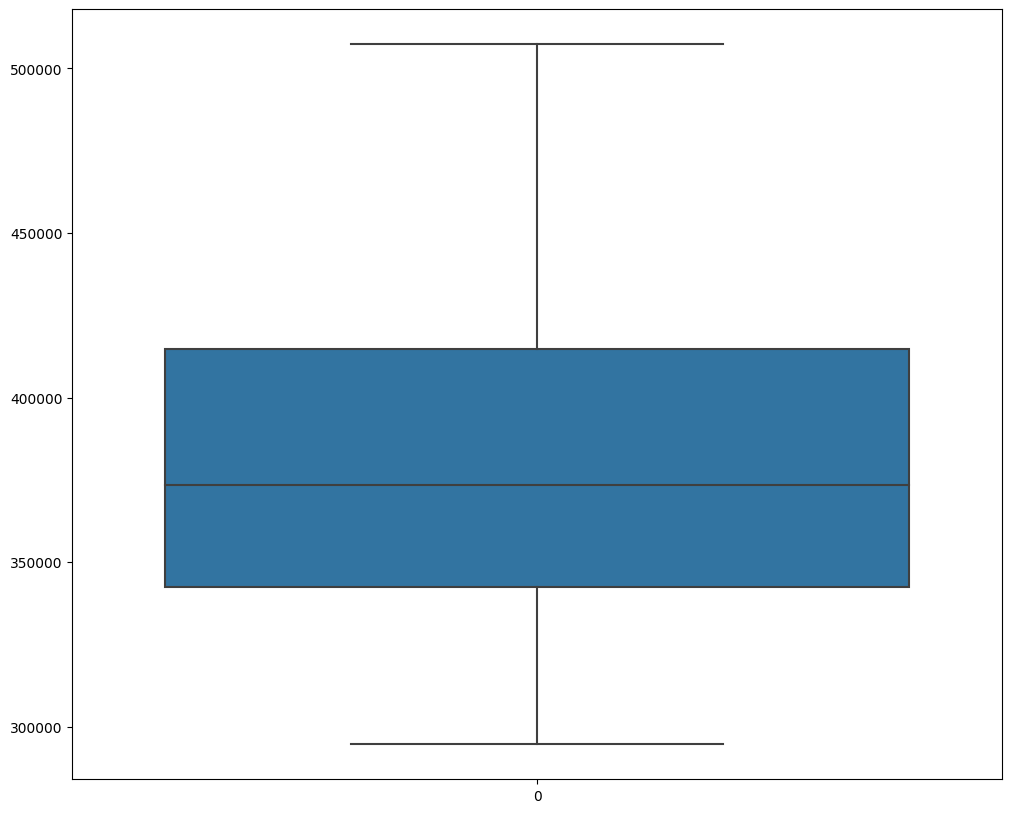

In [66]:
plt.figure(figsize=(12,10))
sns.boxplot(data['euro'])
plt.show()

<Axes: xlabel='Regions', ylabel='euro'>

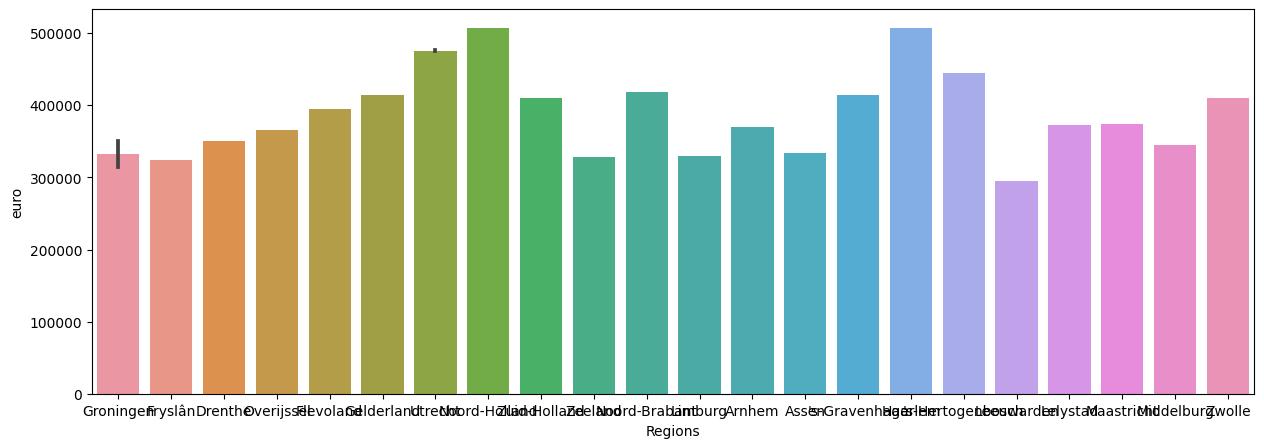

In [67]:
plt.figure(figsize=(15,5))
sns.barplot(data = data, x='Regions', y='euro')

In [68]:
geo_df = gpd.read_file('gadm41_NLD_1.json')
geo_df = geo_df.merge(data, how='left', left_on='NAME_1', right_on='Regions')
geo_df = geo_df[geo_df['ENGTYPE_1'] == 'Province']

<Axes: >

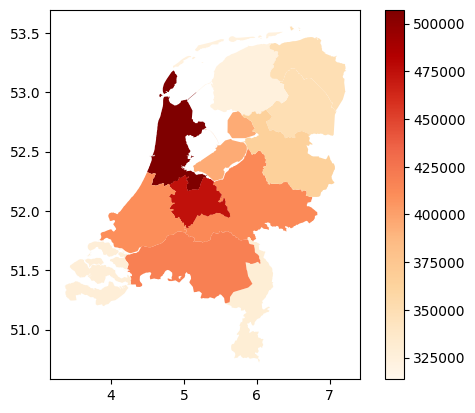

In [69]:
geo_df.plot(column='euro', legend = True, cmap='OrRd')

In [70]:
geo_df.explore(
column="euro",
    tooltip="euro", 
    popup=True,
    legend = True,
    tiles="CartoDB positron",
    cmap="GnBu",
    style_kwds=dict(color="gray")
    )